<a href="https://colab.research.google.com/github/betuelaras/Heartdiseaseprediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Load the dataset

In [ ]:
df = pd.read_csv('/content/sample_data/heart_cleveland_upload.csv')

In [ ]:
df.head(20).style.background_gradient(cmap="Reds")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.100000,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.800000,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.600000,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.400000,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.800000,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.600000,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.300000,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.600000,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.900000,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.200000,2,0,2,0


In [ ]:
sns.pairplot(df,hue = 'target', height = 2)

# Target Variable Distribution

# Distribution Density Plots

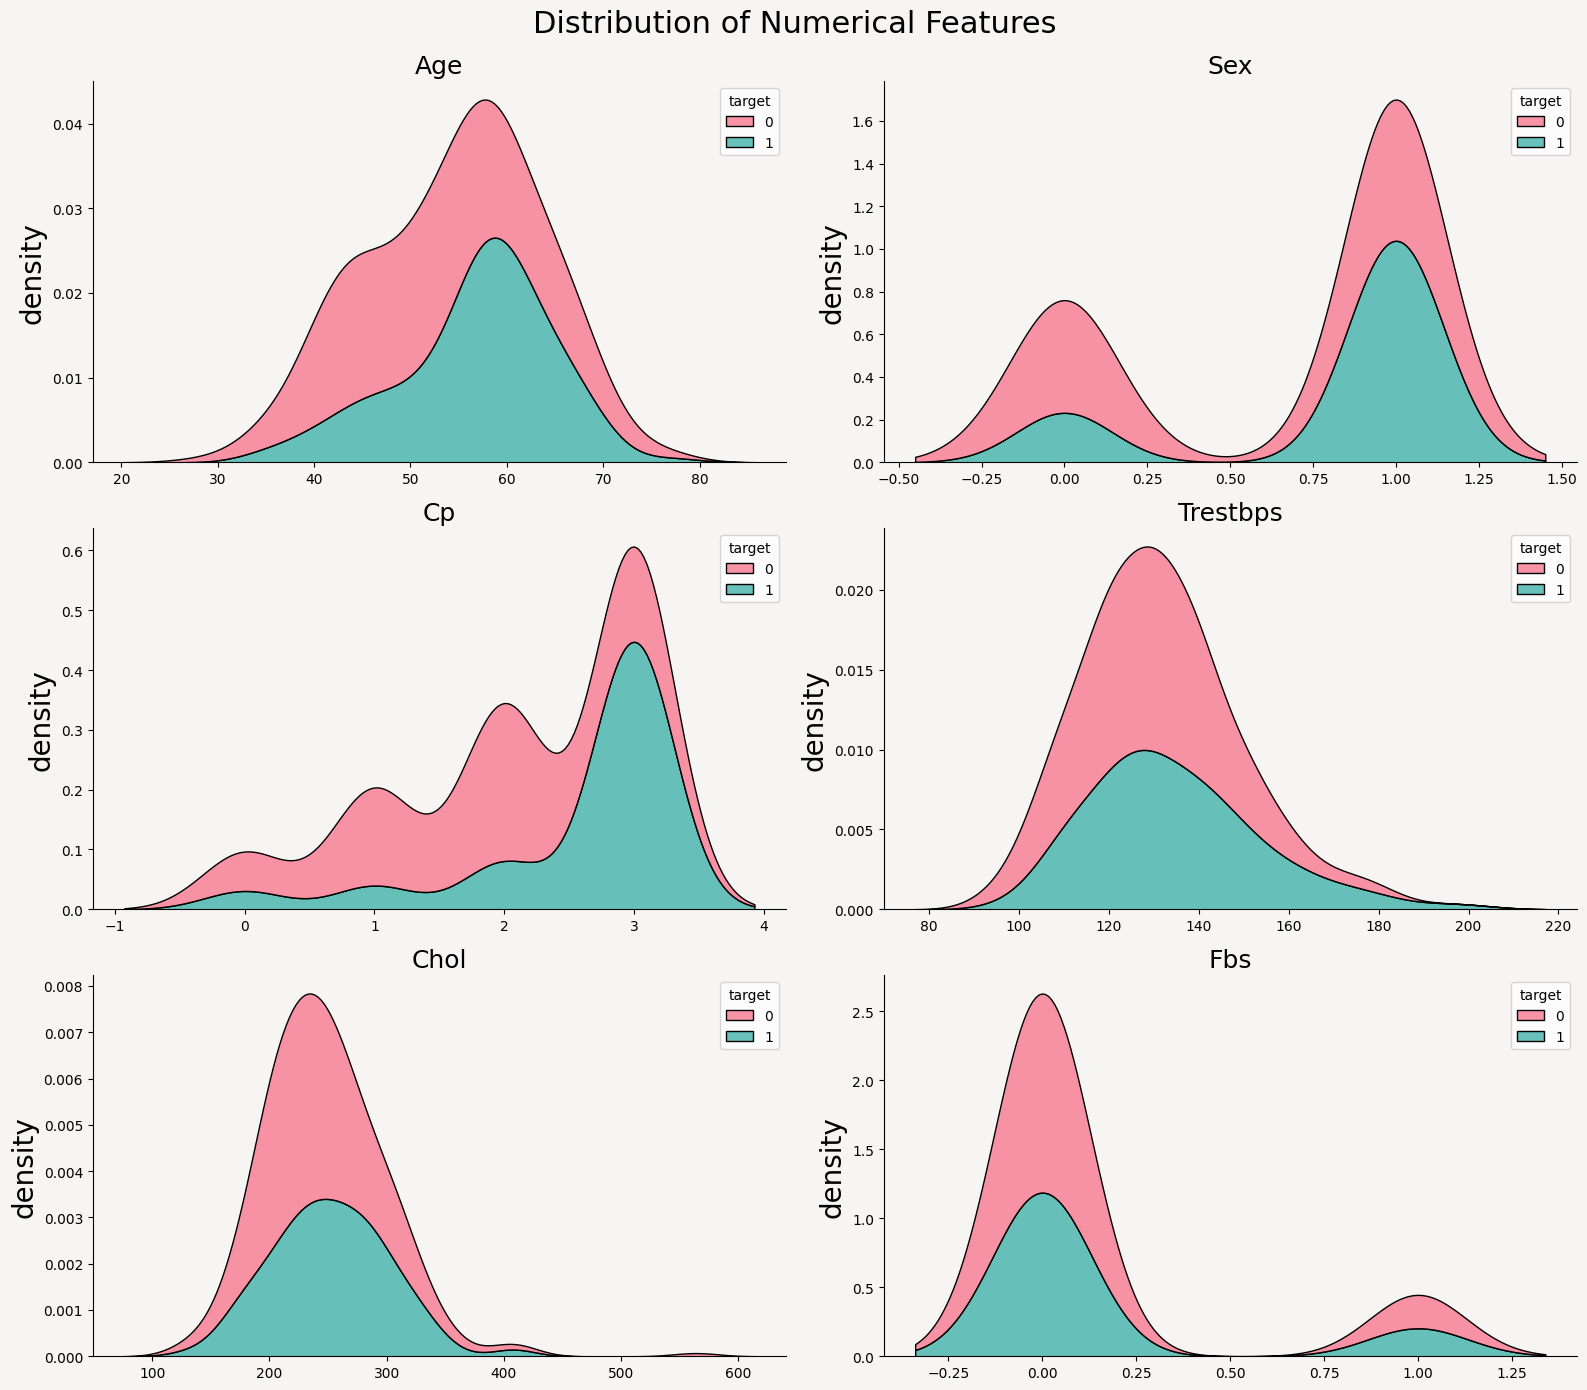

In [ ]:
#remove_last= (nrow * ncol) - L
#fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4'):
#This line creates a subplot grid with nrow rows and ncol columns using the subplots() function from Matplotlib.
#It also sets the size of the figure to 16 inches in width and 14 inches in height and sets the background color of the entire figure to '#F6F5F4'.

#ncol = 2 and nrow = int(np.ceil(L/ncol)): The ncol variable represents the number of columns you want in the subplot grid,
#and nrow represents the number of rows required to fit all the numerical features.
#It calculates the number of rows needed to display the numerical features based on the ncol value.
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/heart_cleveland_upload.csv')

# Assuming 'target' is the column in the DataFrame indicating the presence or absence of heart disease
target_column = 'target'

# Assuming num_feats is a list containing the names of numerical features from the DataFrame
#num_feats = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

#remove_last= (nrow * ncol) - L
# Assuming num_feats is a list containing the names of numerical features from the DataFrame
num_feats = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Display only the first 6 columns
num_feats = num_feats[:6]

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4)  # Adjusting top margin and horizontal spacing between subplots

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=df, x=col, hue=target_column, multiple="stack", palette='husl')
    ax.set_xlabel(None)  # Remove x-axis label from the KDE plot
    ax.set_ylabel("density", fontsize=20)
    ax.xaxis.labelpad = 20  # Adjust the padding between the plot and x-axis label
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col in ['ca', 'thal']:
        ax2 = ax.twinx()  # Create a twin y-axis to display counts
        sns.countplot(data=df, x=col, hue=target_column, palette='husl', ax=ax2)
        ax2.set_ylim(0, df[col].nunique())  # Set the y-axis limit to display counts properly
        ax2.set_ylabel('Count', fontsize=14)
        ax2.yaxis.labelpad = 20  # Adjust the padding between the plot and y-axis label
        ax2.legend().remove()  # Remove legend from count plot

    # Adding a title to each graph with the corresponding feature name
    ax.set_title(col.capitalize(), fontsize=18)

    i += 1

plt.suptitle('Distribution of Numerical Features', fontsize=22, y=0.99)  # Adjusting title position
plt.tight_layout()  # Ensuring proper spacing between subplots
plt.show()
#It uses Seaborn's sns.kdeplot() function to plot the Kernel Density Estimation (KDE) of the current numerical feature (col) with respect to the 'target' column.
#The KDE plot shows the probability density function of the data for each target class (assuming the 'target' column is categorical).

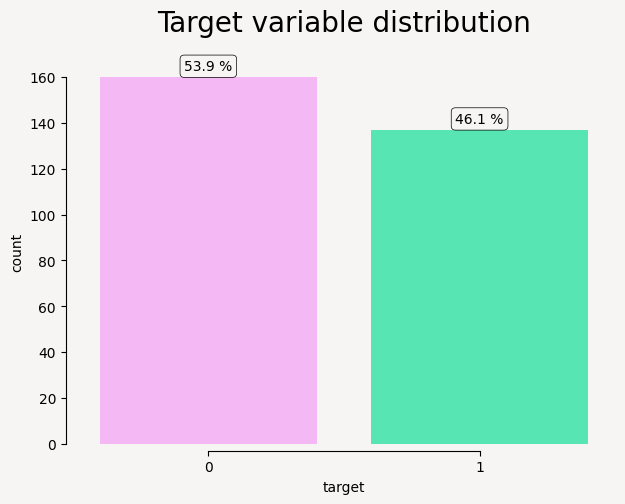

In [ ]:
# Load the UCI Cleveland Heart Disease dataset
#data = pd.read_csv('/path/to/your/dataset.csv')
data = pd.read_csv('/content/sample_data/heart_cleveland_upload.csv')
# Define the custom color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

# Create the count plot
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

# Annotate the percentage of occurrences for each category
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Set the title and improve plot appearance
ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Show the plot
plt.show()

In [ ]:
#The head() method returns a specified number of rows, string from the top. Returns the first 5 rows if a number is not specified.
df.head()

In [ ]:
df.describe()

In [ ]:
# Checking for missing values.
df.isnull().values.any()

False

In [ ]:
#View summary of dataset
df.info()

In [ ]:
df.describe()

Preprocessing SMOTE

In [ ]:
#Preprocessing, SMOTE

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 2: Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Check class distribution before applying SMOTE
print("Class distribution before applying SMOTE:")
print(y_train.value_counts())

# Step 5: Apply SMOTE to the training set to create synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Combine the synthetic samples with the original training set to create a balanced dataset
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name='target')], axis=1)

# Step 7: Check class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(df_resampled['target'].value_counts())

Class distribution before applying SMOTE:
0    128
1    109
Name: target, dtype: int64
Class distribution after applying SMOTE:
1    128
0    128
Name: target, dtype: int64


In [ ]:
import seaborn as sns
#obtain the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

Check for Outliers


In [ ]:
# Plot box plots for each feature

# Load the dataset
df = pd.read_csv('/content/sample_data/heart_cleveland_upload.csv')

# Plot box plots for each feature
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.boxplot(data=df, orient='h')
plt.title("Box Plots of All Columns")
plt.show()

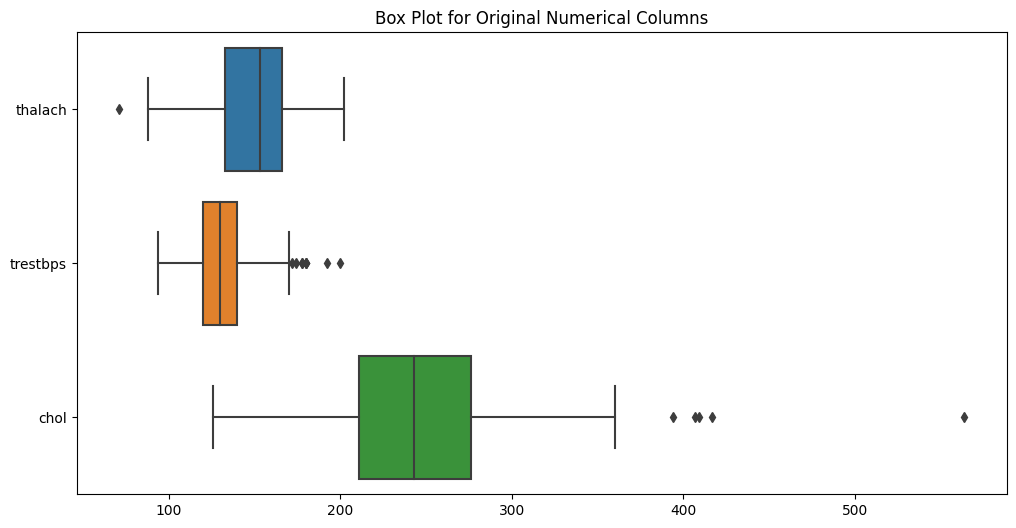

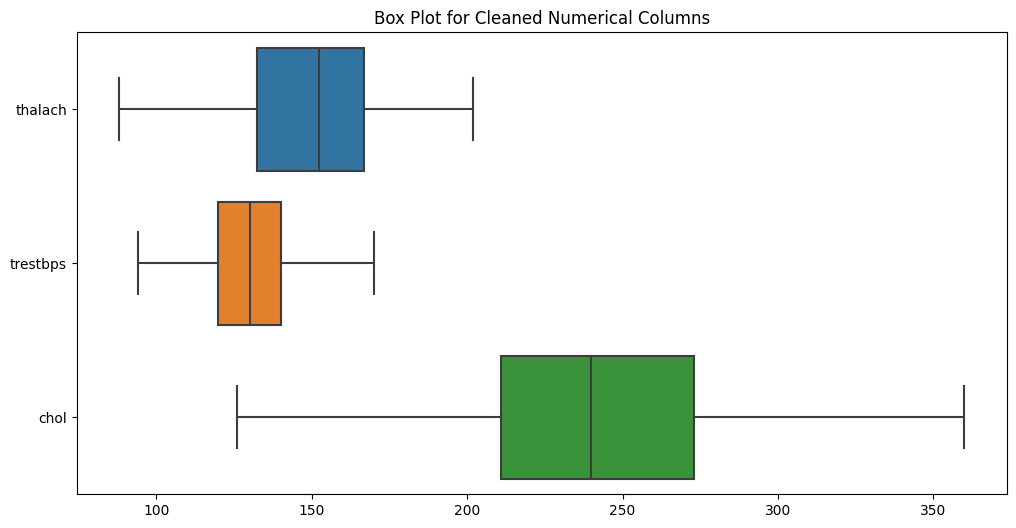

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(dataframe, columns, multiplier=1.5):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

# Define the columns on which you want to remove outliers
# For example, let's assume 'age', 'trestbps', and 'chol' are numerical columns with outliers
columns_to_remove_outliers = ['thalach', 'trestbps', 'chol']

# Remove outliers using IQR method
df_cleaned = remove_outliers_iqr(df, columns_to_remove_outliers)

# Show box plots for the original (uncleaned) columns using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_remove_outliers], orient='h')
plt.title("Box Plot for Original Numerical Columns")
plt.show()

# Show box plots for the cleaned columns using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[columns_to_remove_outliers], orient='h')
plt.title("Box Plot for Cleaned Numerical Columns")
plt.show()

Feauture Selection

In [ ]:
# Assuming you have 'df_cleaned' and 'df_original_raw' DataFrames

# Replace 'target_column' with the actual name of your target variable column
target_variable_name = ['target']  # Replace this with the actual name of your target variable column

# Prepare the data for the chi2 test
X_cleaned = df_cleaned[['thalach', 'trestbps', 'chol']]
X_additional = df.drop(columns=['target', 'thalach', 'trestbps', 'chol'])
X = pd.concat([X_cleaned, X_additional], axis=1)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

y = df['target']

# Apply the chi2 test to select the best features
k = 13
best_features = SelectKBest(score_func=chi2, k=k)
X_new = best_features.fit_transform(X_imputed, y)

# Get the indices of the selected features
selected_feature_indices = best_features.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_feature_names)

In [ ]:
#Replace outlier columns
# Step 2: Identify the columns you want to replace
columns_to_replace = ['thalach', 'trestbps', 'chol']

# Step 3: Decide on a strategy for replacing values (e.g., mean)
replacement_value = df[columns_to_replace].mean()

# Step 4: Replace the values in the selected columns with the chosen replacement value
df[columns_to_replace] = df[columns_to_replace].fillna(replacement_value)

# Optional: Check for missing values after replacement
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

In [ ]:
#Check for missing values
# Check the first few rows of the DataFrame to get a glimpse of the data
print(df.head())

# Get information about the columns, data types, and non-null counts
print(df.info())

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Descriptive statistics of the numeric columns
print(df.describe())

# Descriptive statistics of all columns (including non-numeric ones)
print(df.describe(include='all'))

# Count the occurrences of unique values in a particular column (e.g., target variable)
print(df['target'].value_counts())

In [ ]:
sns.heatmap(df_cleaned)

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

Series([], dtype: float64)

In [ ]:
# Check for NaN values in each column
nan_columns = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
#Histogram
#Data visualization of data distribution (Histogram)

# List of columns for which you want to create histograms
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
#age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
# Calculate the number of rows and columns for subplots
n_cols = 5
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

# Calculate the figure size based on the desired width and height
fig_width = 10.27  # Width of half A4 paper in inches
fig_height = 5 * n_rows / 2  # Height of half A4 paper in inches

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the columns and create histograms
for i, col in enumerate(columns):
    ax = axes[i]  # Get the current axis
    df[col].hist(ax=ax)  # Create histogram for the column
    ax.set_title(col)  # Set the title for the histogram

# Hide the empty subplots
for j in range(len(columns), n_cols * n_rows):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

Model Development

# Find columns with categorical data


In [ ]:
df = pd.read_csv('/content/sample_data/heart_cleveland_upload.csv')
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: []


In [ ]:
# Get data types of the 13 attribute columns
attribute_data_types = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].dtypes

# Filter for columns with "object" data type (categorical columns)
categorical_columns = attribute_data_types[attribute_data_types == "object"].index.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: []


# **Split** the data into training and testing sets:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

from sklearn.model_selection import train_test_split
y=df['target']
X=df.drop(['target'],axis=1)
# Split the data into training and testing sets (70% train, 30% test, for example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Apply the StandardScaler for K-nearest neighbors (KNN):


In [ ]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training features for KNN using the StandardScaler
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

Create and fit the KNN classifier:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Create and fit the KNN classifier using the scaled features
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn_classifier.fit(X_train_scaled, y_train)
# Step 6: Train and evaluate K-Nearest Neighbors Classifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Step 7: Calculate Accuracy, Precision, and Error Rate for K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average="binary", pos_label=1)
error_rate_knn = 1 - accuracy_knn

print("\nK-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.4f} ({accuracy_knn * 100:.2f}%)")
print(f"Error Rate: {error_rate_knn:.4f} ({error_rate_knn * 100:.2f}%)")
print(f"Precision: {precision_knn:.4f} ({precision_knn * 100:.2f}%)")


K-Nearest Neighbors:
Accuracy: 0.5889 (58.89%)
Precision: 0.5714 (57.14%)
Error Rate: 0.4111 (41.11%)


Create and fit the Decision Tree classifier:

In [ ]:
# Create and fit the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Step 8: Train and evaluate Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 9: Calculate Accuracy, Precision, and Error Rate for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average="binary", pos_label=1)
error_rate_dt = 1 - accuracy_dt

print("\nDecision Tree:")
print(f"Accuracy: {accuracy_dt:.4f} ({accuracy_dt * 100:.2f}%)")
print(f"Error Rate: {error_rate_dt:.4f} ({error_rate_dt * 100:.2f}%)")
print(f"Precision: {precision_dt:.4f} ({precision_dt * 100:.2f}%)")




Decision Tree:
Accuracy: 0.7333 (73.33%)
Precision: 0.6957 (69.57%)
Error Rate: 0.2667 (26.67%)


Create and fit the Random Forest classifier:

In [1]:
# Create and fit the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 4: Train and evaluate Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 5: Calculate Accuracy, Precision, and Error Rate for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="binary", pos_label=1)
error_rate_rf = 1 - accuracy_rf

# Step 10: Print the results (rounded to 4 digits and in percentage)
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f} ({accuracy_rf * 100:.2f}%)")
print(f"Error Rate: {error_rate_rf:.4f} ({error_rate_rf * 100:.2f}%)")
print(f"Precision: {precision_rf:.4f} ({precision_rf * 100:.2f}%)")


NameError: ignored

### **Visualize**

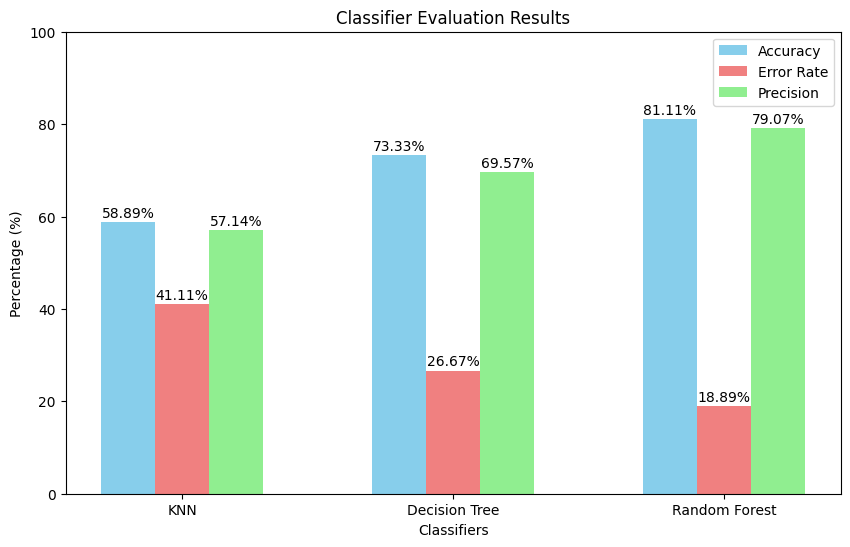

In [ ]:


classifiers = ['KNN', 'Decision Tree', 'Random Forest']
accuracy_values = [accuracy_knn * 100, accuracy_dt * 100, accuracy_rf * 100]
error_rate_values = [error_rate_knn * 100, error_rate_dt * 100, error_rate_rf * 100]
precision_values = [precision_knn * 100, precision_dt * 100, precision_rf * 100]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.bar(index, accuracy_values, bar_width, color='skyblue', label='Accuracy')
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

# Plot Error Rate (Next to Accuracy)
plt.bar(index + bar_width, error_rate_values, bar_width, color='lightcoral', label='Error Rate')
for i, v in enumerate(error_rate_values):
    plt.text(i + bar_width, v + 1, f"{v:.2f}%", ha='center')

# Plot Precision (Next to Error Rate)
plt.bar(index + 2 * bar_width, precision_values, bar_width, color='lightgreen', label='Precision')
for i, v in enumerate(precision_values):
    plt.text(i + 2*bar_width, v + 1, f"{v:.2f}%", ha='center')

plt.xlabel('Classifiers')
plt.ylabel('Percentage (%)')
plt.title('Classifier Evaluation Results')
plt.xticks(index + bar_width, classifiers)
plt.legend()
plt.ylim(0, 100)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Data
classifiers = ['KNN', 'Decision Tree', 'Random Forest']
accuracy_values = [58.89, 73.33, 81.11]
error_rate_values = [41.11, 26.67, 18.89]
precision_values = [57.14, 69.57, 79.07]

# Create subplots
fig = go.Figure()

# Add Accuracy
fig.add_trace(go.Bar(x=classifiers, y=accuracy_values, name='Accuracy', marker_color='skyblue'))

# Add Error Rate
fig.add_trace(go.Bar(x=classifiers, y=error_rate_values, name='Error Rate', marker_color='lightcoral'))

# Add Precision
fig.add_trace(go.Bar(x=classifiers, y=precision_values, name='Precision', marker_color='lightgreen'))

# Update layout
fig.update_layout(title='Classifier Evaluation Results',
                  xaxis_title='Classifiers',
                  yaxis_title='Percentage (%)',
                  barmode='group',
                  bargap=0.1,
                  bargroupgap=0.2,
                  legend_title_text='Metrics')

# Show plot
fig.show()

In [ ]:
# Data
classifiers = ['KNN', 'Decision Tree', 'Random Forest']
accuracy_values = [58.89, 73.33, 81.11]
error_rate_values = [41.11, 26.67, 18.89]
precision_values = [57.14, 69.57, 79.07]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Combine the metrics for each classifier into a single list
metrics = [accuracy_values, error_rate_values, precision_values]

# Colors for the pie chart slices
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Labels for the pie chart slices
labels = ['Accuracy', 'Error Rate', 'Precision']

# Create the pie chart
for i in range(len(classifiers)):
    ax.pie(metrics[i], labels=labels, colors=colors, startangle=90, counterclock=False,
           wedgeprops=dict(width=0.3, edgecolor='w'), radius=0.6 + 0.2 * i)

# Add a circle in the center to make it a donut chart
ax.add_artist(plt.Circle((0, 0), 0.3, color='white'))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add title and legend
ax.set_title('Classifier Evaluation Metrics')
ax.legend(classifiers, title='Classifiers', loc='upper left')

# Show the pie chart
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the UCI Cleveland Heart Disease dataset (assuming the data is already loaded into a DataFrame named 'data')
# Split the data into features (X) and target labels (y)
X = data.drop('target', axis=1)
y = data['target']

# Create and fit the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get user input for patient data
print("Please enter the following information for the patient:")
age = int(input("Age: "))
sex = int(input("Sex (0 for female, 1 for male): "))
cp = int(input("Chest Pain Type (0-3): "))
trestbps = int(input("Resting Blood Pressure (mm Hg): "))
chol = int(input("Serum Cholesterol (mg/dl): "))
fbs = int(input("Fasting Blood Sugar (> 120 mg/dl, 0 for False, 1 for True): "))
restecg = int(input("Resting Electrocardiographic Results (0=Normal, 1=ST-T wave abnormality (depression > 0.05 mV, 2=Probable/Definite left ventricular hypertrophy"))
thalach= int(input("Achieved maximum heart rate during exercise: "))
exang = int(input(" (chest pain or discomfort) when engaging in physical activity.1=Yes, 0=No: "))
oldpeak = int(input("Exercise-induced ST depression compared to rest: "))
slope = int(input("ST segment’s structure and trajectory, 1=Upsloping, 2=Flat, or,3=Downsloping: "))
ca = int(input("Num Major vessel coloration with flourosopy: "))
thal = int(input(" blood circulation to the heart musculature during exercis Num 3 = Normal, 6 = Fixed defect, 7 = Reversable defect: "))


# ... Add other features here

# Create a DataFrame with the user input
new_patient_data = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalach': [thalach],
    'exang': [exang],
    'oldpeak': [oldpeak],
    'slope': [slope],
    'ca': [ca],
    'thal': [thal]

    # ... Add other features here
})

# Make predictions for the new patient data
predicted_target = rf.predict(new_patient_data)

# Output the prediction result
if predicted_target[0] == 0:
    print("Based on the input data, the patient does not have heart disease.")
else:
    print("Based on the input data, the patient has heart disease.")

Please enter the following information for the patient:
Age: 27
Sex (0 for female, 1 for male): 0
Chest Pain Type (0-3): 0
Resting Blood Pressure (mm Hg): 120
Serum Cholesterol (mg/dl): 220
Fasting Blood Sugar (> 120 mg/dl, 0 for False, 1 for True): 0
Resting Electrocardiographic Results (0=Normal, 1=ST-T wave abnormality (depression > 0.05 mV, 2=Probable/Definite left ventricular hypertrophy0
Achieved maximum heart rate during exercise: 0
 (chest pain or discomfort) when engaging in physical activity.1=Yes, 0=No: 0
Exercise-induced ST depression compared to rest: 120
ST segment’s structure and trajectory, 1=Upsloping, 2=Flat, or,3=Downsloping: 2
Num Major vessel coloration with flourosopy: 1
 blood circulation to the heart musculature during exercis Num 3 = Normal, 6 = Fixed defect, 7 = Reversable defect: 3
Based on the input data, the patient has heart disease.
